In [2]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


from sklearn import datasets


iris = datasets.load_iris()
X = iris.data
Y = iris.target

# Split-out validation dataset

from sklearn import model_selection
validation_size = 0.20
seed = 7
scoring='accuracy'

#import random
#random.shuffle(iris_df.values)
#iris_df.values
#X = iris_df.values[:,:4]
#Y = iris_df.values[:,4]
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(
    X, Y, test_size=validation_size, random_state=seed)

In [9]:
def machine_learning(name, model):
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    return cv_results.mean(), cv_results.std()

In [10]:
machine_learning('KNN', KNeighborsClassifier())

(0.9833333333333332, 0.03333333333333335)

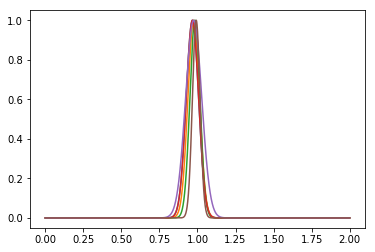

In [31]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
means = []
stdev = []
names = []


import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(111)
xx = np.arange(0,2,1e-4)
for name, model in models:
    names.append(name)
    mean, std = machine_learning( name, model )
    means.append(mean)
    stdev.append(std)
    yy = np.exp( -np.power(xx - mean, 2.) / (2 * np.power(std, 2.)))
    ax.plot(xx,yy)
    
plt.show()